# Chapter 1: Exploratory Data Analysis (EDA)

## 1. Introduction: The Philosophy of Data
**Exploratory Data Analysis (EDA)** is the first and most critical step in any data science project. It is the process of summarizing and visualizing data to uncover insights *before* formal modeling commences.

### Historical Context
* **Classical Statistics:** Focused heavily on **Inference** (drawing conclusions about a large population from a small sample using complex proofs).
* **The Shift (1977):** John W. Tukey published *Exploratory Data Analysis*, arguing that statistics should be about **discovery**, not just confirmation. He treated data analysis as a branch of experimental science.
* **Modern Era:** With big data and Python/R, EDA is used to "debug" data—checking for quality, outliers, and patterns that automated models might miss.

---

## 2. Elements of Structured Data
Data comes in many forms (images, text, audio), but for statistical analysis, we must convert it into **Structured Data** (Rectangular Data).

### A. The Data Frame
The standard container for data (e.g., Pandas DataFrame).
* **Rows:** Records / Observations / Samples / Instances.
* **Columns:** Features / Variables / Attributes / Predictors.

### B. Taxonomy of Data Types
Software handles different data types differently. Knowing the difference is crucial for choosing the right plot and statistical test.

| Family | Subtype | Definition | Kathmandu Example | Synonyms |
| :--- | :--- | :--- | :--- | :--- |
| **Numeric** | **Continuous** | Any value in an interval (can have decimals). | PM₂.₅ concentration ($45.2, 120.7 \mu g/m^3$) | Float, Interval |
| | **Discrete** | Integer counts only. | Number of active sensors ($5, 12$) | Integer, Count |
| **Categorical** | **Nominal** | Categories with no inherent order. | Station Name (Ratnapark, Pulchowk) | Factor, Enum |
| | **Binary** | Two mutually exclusive categories. | Is it raining? (Yes/No) | Boolean, Logical |
| | **Ordinal** | Categories with a clear ranking. | Air Quality Index (Good < Unhealthy < Hazardous) | Ordered Factor |

---

## 3. Estimates of Location (Central Tendency)
"Where is the center of the data?" 
Different metrics give different answers depending on the data's shape.

### A. The Mean (Average)
The sum of all values divided by the number of values.
$$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$
* **Strength:** Uses every data point.
* **Weakness:** **Not Robust.** Highly sensitive to outliers. 
* *Example:* One day of extreme pollution ($400 \mu g/m^3$) can pull the monthly average up, even if the rest of the month was clean.

### B. The Median
The middle value when data is sorted.
* **Strength:** **Robust.** Extreme values generally do not affect it.
* *Example:* If readings are `[20, 22, 25, 30, 500]`, the Median is **25**, but the Mean is **119**. The Median reflects the "typical" experience better.

### C. The Trimmed Mean
The mean calculated after dropping a fixed number of extreme values (e.g., top and bottom 10%).
$$\bar{x}_{trim} = \frac{\sum_{i=p+1}^{n-p} x_{(i)}}{n - 2p}$$
* **Use Case:** A compromise. It eliminates extreme sensor errors but uses more data than the median.

### D. The Weighted Mean
The mean where some values count more than others.
$$\bar{x}_{w} = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$$
* **Use Case:** If the "US Embassy" sensor is more precise than a cheap "DIY Sensor," we assign a higher weight ($w$) to the Embassy data.

---

## 4. Estimates of Variability (Dispersion)
"How spread out is the data?" 
Location tells us the center; variability tells us the reliability.

### A. Deviations
The difference between an observed value and the mean: $(x - \bar{x})$.

### B. Variance & Standard Deviation
* **Variance ($s^2$):** The average of the *squared* deviations.
    $$s^2 = \frac{\sum (x - \bar{x})^2}{n - 1}$$
    *(Note: We use $n-1$ for sample variance to correct for bias).*
* **Standard Deviation ($s$):** The square root of variance. It returns the scale to the original units (e.g., from "squared pollution" back to $\mu g/m^3$).
    * **Weakness:** Like the mean, it is sensitive to outliers.

### C. Mean Absolute Deviation (MAD)
The average of the absolute values of the deviations.
$$\text{Mean Abs Dev} = \frac{\sum |x - \bar{x}|}{n}$$

### D. Median Absolute Deviation (Robust MAD)
The median of the absolute deviations from the median.
$$\text{MAD} = \text{Median}(|x_i - \text{Median}(x)|)$$
* **Strength:** Extremely robust against outliers.

### E. Estimates Based on Percentiles (Order Statistics)
* **Range:** Max - Min. (Very sensitive to outliers).
* **Interquartile Range (IQR):** The difference between the 75th percentile ($Q3$) and the 25th percentile ($Q1$).
    $$IQR = Q3 - Q1$$
    * **Interpretation:** The spread of the "middle 50%" of the data.

---

## 5. Exploring the Data Distribution
Visualizing how the data is shaped reveals patterns that summary statistics miss.

### A. Boxplots (Box-and-Whiskers)
A standard plot to view the distribution and spot outliers.
* **Box:** Represents the IQR (from Q1 to Q3).
* **Line inside Box:** The Median.
* **Whiskers:** Extend to the furthest data point within $1.5 \times IQR$.
* **Points:** Any data beyond the whiskers is plotted individually as an **Outlier**.

### B. Frequency Tables & Histograms
* **Frequency Table:** Separates data into equal-width bins (e.g., 0-50, 50-100) and counts occurrences.
* **Histogram:** A visual plot of the frequency table. It shows the **Shape** of the data.
    * **Skewness:** * *Right-Skewed (Positive):* Long tail to the right (common in pollution data).
        * *Left-Skewed (Negative):* Long tail to the left.
    * **Kurtosis:** Propensity for "heavy tails" (frequent extreme values).

### C. Density Plots
A "smoothed" version of a histogram. It estimates the probability density function. Ideally, the area under the curve equals 1.

---

## 6. Exploring Binary and Categorical Data
Summary statistics like "Mean" and "Variance" don't apply here.

### A. The Mode
The most frequently occurring category.
* *Example:* If "Moderate" appears more often than "Unhealthy," then "Moderate" is the mode.

### B. Expected Value
Used when categories can be mapped to numeric values (often prices or costs).
$$EV = \sum P(x_i) \times V(x_i)$$
* **Probability ($P$):** The chance of the event occurring.
* **Value ($V$):** The numeric value of that event.

### C. Probabilities
* **Probability:** The likelihood that an event will occur (0 to 1).
* **Odds:** The ratio of "Success" to "Failure" ($P / (1-P)$).

---

## 7. Correlation (Bivariate Analysis)
Examining the relationship between two **numeric** variables.

### A. Pearson Correlation Coefficient ($r$)
Measures the strength of the **Linear** relationship.
$$r = \frac{\sum (x - \bar{x})(y - \bar{y})}{(n-1) s_x s_y}$$
* **+1:** Perfect positive correlation.
* **-1:** Perfect negative correlation.
* **0:** No linear relationship.
* *Caution:* $r$ is sensitive to outliers.

### B. Spearman's Rho / Kendall's Tau
Rank-based correlation methods. They measure if variables move in the same direction, even if the relationship isn't perfectly linear. They are **Robust**.

### C. Scatterplots
The standard visual for correlation.
* X-axis: Independent Variable (e.g., Wind Speed).
* Y-axis: Dependent Variable (e.g., PM₂.₅).

---

## 8. Multivariate Analysis (Two or More Variables)
Real-world problems usually involve complex interactions.

### A. Hexagonal Binning
* **Problem:** With millions of points, a scatterplot becomes a solid black blob ("overplotting").
* **Solution:** Group points into hexagons and color-code them by density (count).

### B. Contours
Similar to a topographical map. Shows "peaks" of data density in two dimensions.

### C. Contingency Tables (Crosstabs)
Used for two **Categorical** variables.
* *Example:* Rows = Season (Winter, Summer), Columns = Alert Level (High, Low). The cells contain the counts.

### D. Violin Plots
A combination of a **Boxplot** and a **Density Plot**.
* Shows the median/IQR (like a boxplot).
* Shows the "fatness" of the distribution (density) at different values.

### E. Faceting (Conditioning)
Splitting a plot into multiple sub-plots based on a grouping variable.
* *Example:* Plotting "Wind Speed vs. Pollution" separately for each "Season" to see if the relationship changes.

✅ Data Generation Complete. First 5 rows:


,Date,Season,Temperature,PM2.5,Station,AQI_Category
0,2024-01-01,Winter,13.439895,285.125205,Ratnapark,Hazardous
1,2024-01-02,Winter,12.336744,242.908660,Ratnapark,Hazardous
2,2024-01-03,Winter,14.076162,104.708521,Shankapark,Unhealthy
3,2024-01-04,Winter,15.995015,91.569364,US Embassy,Moderate
4,2024-01-05,Winter,12.649426,92.079370,US Embassy,Moderate



--- 2. ESTIMATES OF LOCATION ---
Mean PM2.5:         94.32 (Sensitive to spikes)
Median PM2.5:       90.85 (Robust - 'Typical' day)
10% Trimmed Mean:   89.95 (Compromise)
👉 Conclusion: Mean > Median. The data is Right-Skewed (Outliers pull the Mean up).

--- 3. ESTIMATES OF VARIABILITY ---
Standard Deviation: 34.22 (Sensitive)
IQR (Q3-Q1):        30.14 (Robust - Spread of middle 50%)
MAD (Robust):       15.41 (Most Robust)


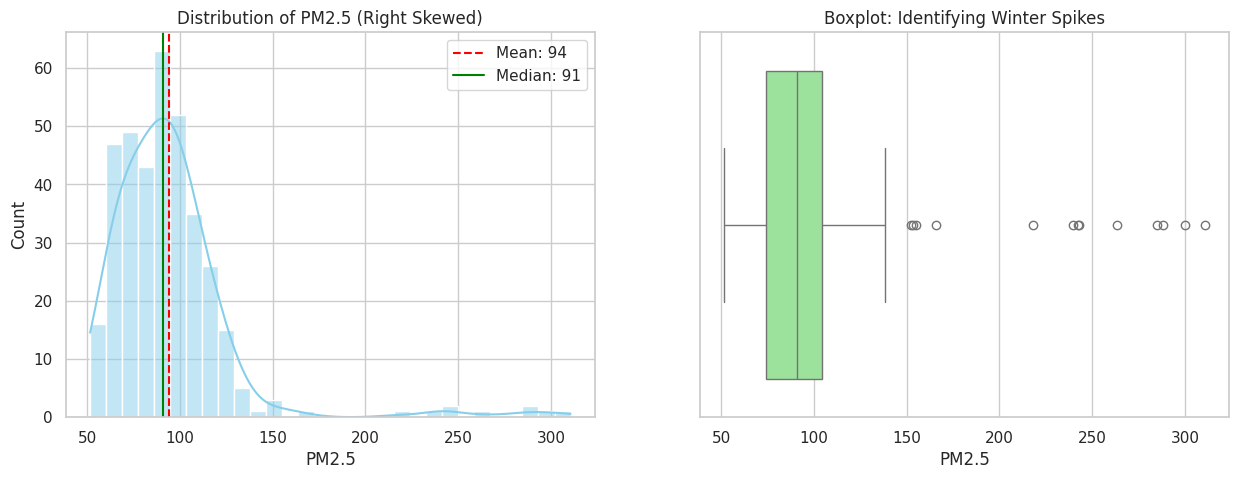

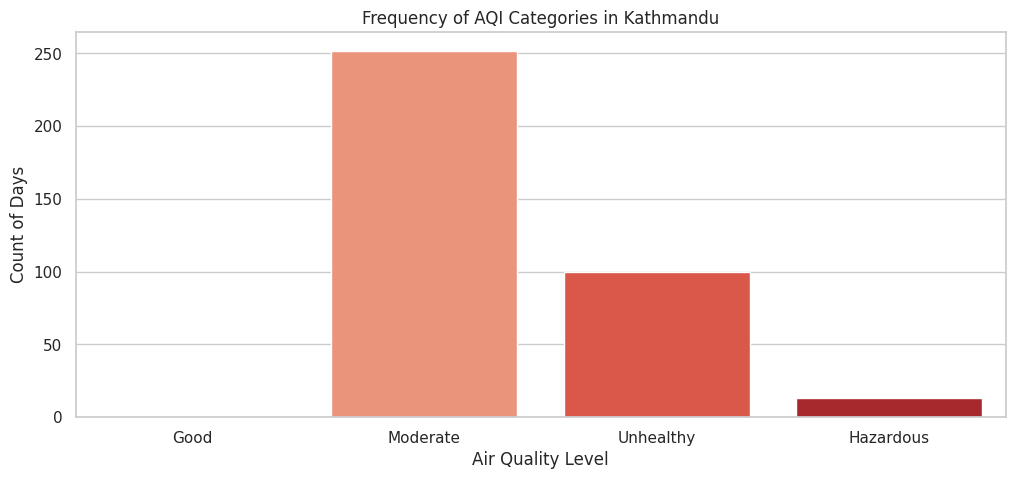


Mode Station (Most Frequent Data Source): Ratnapark

--- 6. CORRELATION ANALYSIS ---
Correlation Matrix:
              Temperature     PM2.5
Temperature     1.000000 -0.451239
PM2.5          -0.451239  1.000000


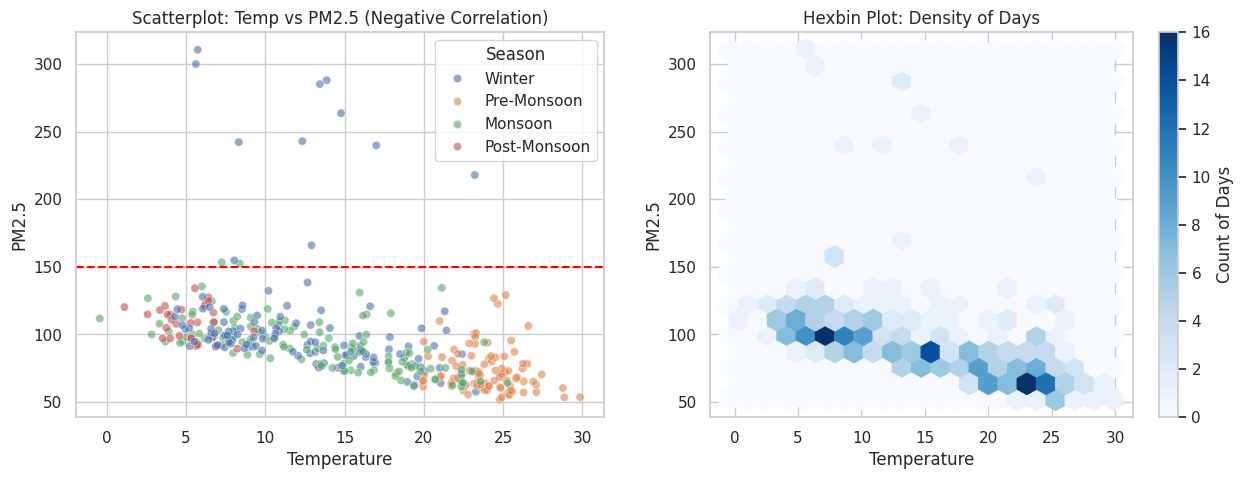


--- 7. MULTIVARIATE ANALYSIS ---


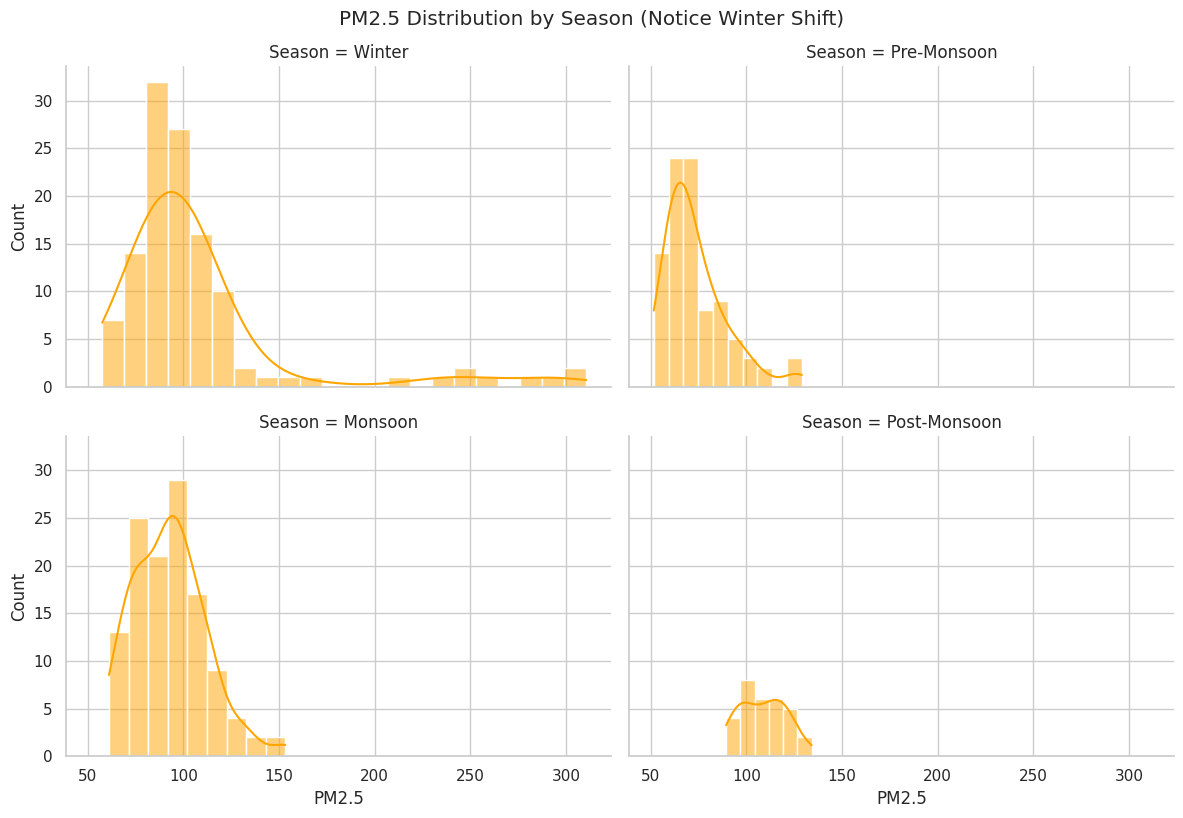

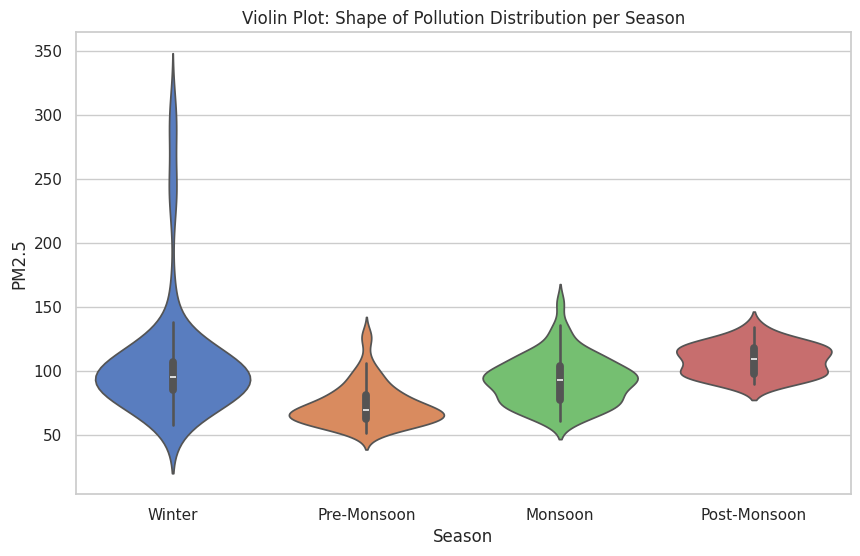

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

# ==========================================
# PART 1: DATA GENERATION (Simulating Kathmandu Air Quality)
# ==========================================
# We create a synthetic dataset reflecting real Kathmandu patterns:
# - Winter: High pollution (inversions), low temp.
# - Monsoon: Low pollution (rain wash), high temp.
# - Stations: 'US Embassy' (Reliable), 'Ratnapark' (Traffic), 'Shankapark' (Residential)

np.random.seed(42) # For reproducibility
days = 365
dates = pd.date_range(start="2024-01-01", periods=days, freq='D')

# Simulate Seasons
# Winter (Jan-Feb, Nov-Dec), Pre-Monsoon (Mar-May), Monsoon (Jun-Sep), Post-Monsoon (Oct)
def get_season(month):
    if month in [1, 2, 11, 12]: return 'Winter'
    elif month in [3, 4, 5]: return 'Pre-Monsoon'
    elif month in [6, 7, 8, 9]: return 'Monsoon'
    else: return 'Post-Monsoon'

seasons = [get_season(d.month) for d in dates]

# Simulate Variables
# Temperature: Cold in winter (min 2°C), Hot in summer (max 30°C)
temp_trend = 15 + 10 * np.sin((np.arange(days) - 15) * 2 * np.pi / 365)
temperature = temp_trend + np.random.normal(0, 2, days)

# PM2.5 (Pollution): Inverse to temperature (Winter Inversion) + Random Spikes
# Base pollution is higher when temp is lower
pm25_base = 100 - (temperature * 2) 
pm25_noise = np.random.gamma(shape=2, scale=10, size=days) # Gamma dist gives right-skew
pm25 = pm25_base + pm25_noise

# Add Extreme Outliers (Winter Inversion Days in Kathmandu)
# On random winter days, pollution spikes to 200+
is_winter = np.array([s == 'Winter' for s in seasons])
random_spikes = np.random.choice([0, 150, 200], size=days, p=[0.95, 0.03, 0.02])
pm25 = pm25 + (is_winter * random_spikes)

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Season': seasons,
    'Temperature': temperature,
    'PM2.5': pm25,
    'Station': np.random.choice(['Ratnapark', 'US Embassy', 'Shankapark'], days)
})

# Add Categorical: AQI Category
def get_aqi_cat(pm):
    if pm <= 50: return 'Good'
    elif pm <= 100: return 'Moderate'
    elif pm <= 150: return 'Unhealthy'
    else: return 'Hazardous'

df['AQI_Category'] = df['PM2.5'].apply(get_aqi_cat)
# Order the categorical variable
aqi_order = ['Good', 'Moderate', 'Unhealthy', 'Hazardous']
df['AQI_Category'] = pd.Categorical(df['AQI_Category'], categories=aqi_order, ordered=True)

print("Data Generation Complete. First 5 rows:")
display(df.head())

# ==========================================
# PART 2: ESTIMATES OF LOCATION (Central Tendency)
# ==========================================
print("\n--- 2. ESTIMATES OF LOCATION ---")

# Mean vs Median
mean_val = df['PM2.5'].mean()
median_val = df['PM2.5'].median()

# Trimmed Mean (Cutting top/bottom 10%)
trimmed_mean = stats.trim_mean(df['PM2.5'], 0.1)

print(f"Mean PM2.5:         {mean_val:.2f} (Sensitive to spikes)")
print(f"Median PM2.5:       {median_val:.2f} (Robust - 'Typical' day)")
print(f"10% Trimmed Mean:   {trimmed_mean:.2f} (Compromise)")

if mean_val > median_val:
    print("👉 Conclusion: Mean > Median. The data is Right-Skewed (Outliers pull the Mean up).")

# ==========================================
# PART 3: ESTIMATES OF VARIABILITY (Dispersion)
# ==========================================
print("\n--- 3. ESTIMATES OF VARIABILITY ---")

# Standard Deviation
std_dev = df['PM2.5'].std()

# IQR (Interquartile Range)
Q1 = df['PM2.5'].quantile(0.25)
Q3 = df['PM2.5'].quantile(0.75)
IQR = Q3 - Q1

# MAD (Median Absolute Deviation) - Most Robust
mad = stats.median_abs_deviation(df['PM2.5'])

print(f"Standard Deviation: {std_dev:.2f} (Sensitive)")
print(f"IQR (Q3-Q1):        {IQR:.2f} (Robust - Spread of middle 50%)")
print(f"MAD (Robust):       {mad:.2f} (Most Robust)")

# ==========================================
# PART 4: EXPLORING DISTRIBUTION (Visuals)
# ==========================================
plt.figure(figsize=(15, 5))

# Plot A: Histogram with Kernel Density Estimate (KDE)
plt.subplot(1, 2, 1)
sns.histplot(df['PM2.5'], kde=True, bins=30, color='skyblue')
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.0f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.0f}')
plt.title('Distribution of PM2.5 (Right Skewed)')
plt.legend()

# Plot B: Boxplot (Showing Outliers)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['PM2.5'], color='lightgreen')
plt.title('Boxplot: Identifying Winter Spikes')
plt.show()

# ==========================================
# PART 5: CATEGORICAL DATA ANALYSIS
# ==========================================
plt.figure(figsize=(12, 5))

# Bar Chart for AQI Categories
sns.countplot(x='AQI_Category', data=df, palette='Reds')
plt.title('Frequency of AQI Categories in Kathmandu')
plt.xlabel('Air Quality Level')
plt.ylabel('Count of Days')
plt.show()

# Mode Calculation
mode_station = df['Station'].mode()[0]
print(f"\nMode Station (Most Frequent Data Source): {mode_station}")

# ==========================================
# PART 6: CORRELATION & RELATIONSHIPS
# ==========================================
print("\n--- 6. CORRELATION ANALYSIS ---")

# Correlation Matrix
corr_matrix = df[['Temperature', 'PM2.5']].corr()
print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(15, 5))

# Scatterplot: Temp vs PM2.5
plt.subplot(1, 2, 1)
sns.scatterplot(x='Temperature', y='PM2.5', data=df, alpha=0.6, hue='Season')
plt.title('Scatterplot: Temp vs PM2.5 (Negative Correlation)')
plt.axhline(150, color='red', linestyle='--', label='Unhealthy Threshold')

# Hexbin Plot (For dense data)
plt.subplot(1, 2, 2)
plt.hexbin(df['Temperature'], df['PM2.5'], gridsize=20, cmap='Blues')
plt.colorbar(label='Count of Days')
plt.title('Hexbin Plot: Density of Days')
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.show()

# ==========================================
# PART 7: MULTIVARIATE ANALYSIS (Faceting)
# ==========================================
print("\n--- 7. MULTIVARIATE ANALYSIS ---")

# FacetGrid: Distribution of PM2.5 by Season
g = sns.FacetGrid(df, col="Season", col_wrap=2, height=4, aspect=1.5)
g.map(sns.histplot, "PM2.5", kde=True, color='orange')
g.fig.suptitle('PM2.5 Distribution by Season (Notice Winter Shift)', y=1.02)
plt.show()

# Violin Plot: Combining Boxplot + Density
plt.figure(figsize=(10, 6))
sns.violinplot(x='Season', y='PM2.5', data=df, palette='muted')
plt.title('Violin Plot: Shape of Pollution Distribution per Season')
plt.show()